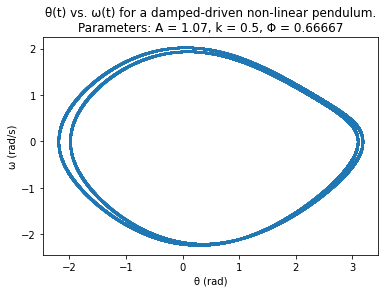

In [321]:
import matplotlib.pyplot as plt
import numpy as np
import math

#Parameters for the pendulum problem
A = 1.07 #this is non-zero, which implies there is a driving force present
k = 0.5 #this is non-zero, which implies damping i.e. friction
g, L = 1.0, 1.0
fi = 0.66667

#A function of the Non-Linear Pendulum formula 
def nonlinear_f(theta, omega, time):
    "This is for the non-linear pendulum case."
    force = (-g/L) * math.sin(theta) - k * omega + A*math.cos(fi*time)  #damping and driven force
    return force

#setting initial conditions
Q = 0.50 #used 0.50 for A = 1.07, used 0.0 for A = 1.47, this is important for shifting theta later
transient = 6500 #used for limited what omega and theta values are recorded later to get rid of "tail" from transient motion
theta = 3.0 
omega = 0.0
t = 0.0
dt = 0.01

#sets lists to empty
list_theta = []
list_omega = []
list_time = []

#Runge-Kutta Algorithm
for _ in range(100000):
    k1a = dt * omega
    k1b = dt * nonlinear_f(theta, omega, t)
    k2a = dt * (omega + k1b/2)
    k2b = dt * nonlinear_f(theta + k1a/2, omega + k1b/2, t + dt/2)
    k3a = dt * (omega + k2b/2)
    k3b = dt * nonlinear_f(theta + k2a/2, omega + k2b/2, t + dt/2)
    k4a = dt * (omega + k3b)
    k4b = dt * nonlinear_f(theta + k3a, omega + k3b, t + dt)
    theta = theta + (k1a + 2 * k2a + 2 * k3a + k4a) / 6
    omega = omega + (k1b + 2 * k2b + 2 * k3b + k4b) / 6
    
    t = t + dt #evolve time step
    list_time.append(t) #add time entry to time list
    
    #this all corrects theta if it is greater than pi+Q or lesser than -pi+Q
    theta %= 2*math.pi
    if theta >= (math.pi + Q):
        theta = theta - (2*math.pi)
    if theta <= (-math.pi + Q):
        theta = theta + (2*math.pi)
    
    if (len(list_time) > transient): #this checks if the time list has transient entries
        if t > list_time[transient]: #if it does, then it checks the transient'th entry, if t is greater then proceed       
            list_theta.append(theta) #add theta and omega to their respective lists
            list_omega.append(omega)
#i know the nested if statements are somewhat redundant, but i wanted to match the manuals outline exactly with the t>t[transient] 

plt.figure()
plt.scatter(list_theta, list_omega, s=1) #plots nonlinear theta plot and omega plot from runge-kutta method
plt.title("θ(t) vs. ω(t) for a damped-driven non-linear pendulum.\nParameters: A = %0.2f, k = %0.1f, Φ = %0.5f" %(A,k,fi))
plt.xlabel('θ (rad)')
plt.ylabel('ω (rad/s)')
plt.grid(False)